# **Overfitting `vs.` Underfitting**

## 1. Setup and Baseline Model

In [3]:
%%time
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

# ignore warnings in the output
import warnings
warnings.filterwarnings("ignore")

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Define a simple model
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_model()

# Train the baseline model
history_baseline = model.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8159 - loss: 9.0290 - val_accuracy: 0.8825 - val_loss: 0.6151
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8957 - loss: 0.4702 - val_accuracy: 0.9174 - val_loss: 0.4309
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9255 - loss: 0.3172 - val_accuracy: 0.9201 - val_loss: 0.3386
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9328 - loss: 0.2641 - val_accuracy: 0.9254 - val_loss: 0.2918
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9412 - loss: 0.2286 - val_accuracy: 0.9392 - val_loss: 0.2568
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9448 - loss: 0.2092 - val_accuracy: 0.9429 - val_loss: 0.2502
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9470 - loss: 0.2105 - val_accuracy: 0.9355 - val_loss: 0.2725
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━

## 2. Run model on Normalized Data

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8679 - loss: 0.4816 - val_accuracy: 0.9573 - val_loss: 0.1514
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9599 - loss: 0.1365 - val_accuracy: 0.9682 - val_loss: 0.1105
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9738 - loss: 0.0891 - val_accuracy: 0.9704 - val_loss: 0.1009
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9808 - loss: 0.0640 - val_accuracy: 0.9694 - val_loss: 0.1012
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9841 - loss: 0.0510 - val_accuracy: 0.9735 - val_loss: 0.0895
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9885 - loss: 0.0384 - val_accuracy: 0.9740 - val_loss: 0.0915
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9911 - loss: 0.0300 - val_accuracy: 0.9728 - val_loss: 0.0947
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9938 - loss: 0.0221 - 

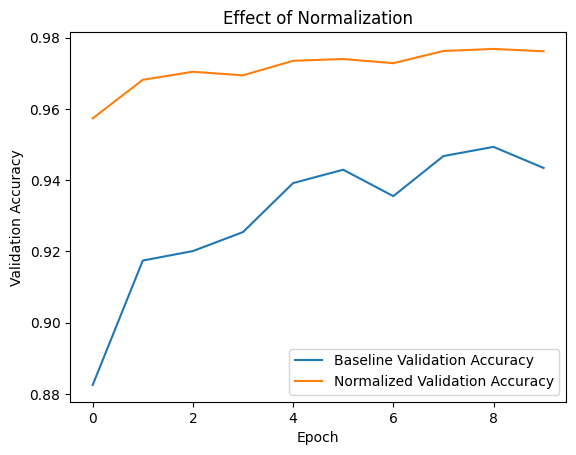

CPU times: user 1min 24s, sys: 17.7 s, total: 1min 42s
Wall time: 48.4 s


In [4]:
%%time
# laod and normalize the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a model for normalized data
def create_model_with_norm_data():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model_with_norm_data = create_model_with_norm_data()

# Train the baseline model
history_norm_data = model_with_norm_data.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1)

# plot the effect of normalization
plt.plot(history_baseline.history['val_accuracy'], label='Baseline Validation Accuracy')
plt.plot(history_norm_data.history['val_accuracy'], label = 'Normalized Validation Accuracy')
plt.title('Effect of Normalization')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

## 3. Adding Dropout
Now, let's modify the model to include dropout and observe its effect.

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7984 - loss: 0.6629 - val_accuracy: 0.9484 - val_loss: 0.1792
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9254 - loss: 0.2555 - val_accuracy: 0.9593 - val_loss: 0.1397
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9402 - loss: 0.2013 - val_accuracy: 0.9653 - val_loss: 0.1175
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9466 - loss: 0.1728 - val_accuracy: 0.9686 - val_loss: 0.1071
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9529 - loss: 0.1522 - val_accuracy: 0.9708 - val_loss: 0.1007
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9559 - loss: 0.1441 - val_accuracy: 0.9729 - val_loss: 0.0970
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9604 - loss: 0.1279 - val_accuracy: 0.9737 - val_loss: 0.0950
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9611 - loss: 0.1255 - 

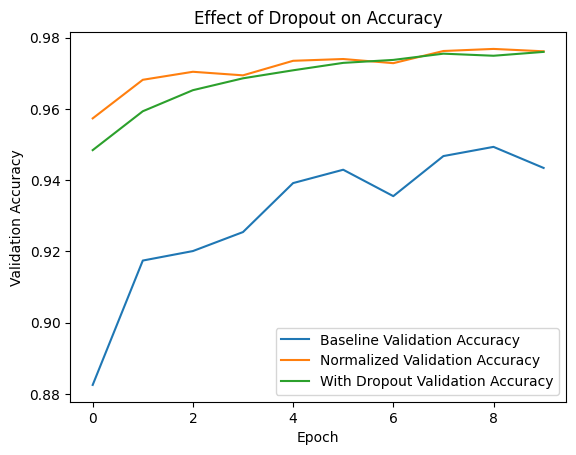

In [5]:
# Define a model with dropout
def create_model_with_dropout():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),  # Adding dropout
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model_with_dropout = create_model_with_dropout()

# Train the model with dropout
history_dropout = model_with_dropout.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1)

# Plotting the effect of dropout
plt.plot(history_baseline.history['val_accuracy'], label='Baseline Validation Accuracy')
# plot line for normalized data
plt.plot(history_norm_data.history['val_accuracy'], label='Normalized Validation Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='With Dropout Validation Accuracy')
plt.title('Effect of Dropout on Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()


## 4. Early Stopping
Finally, we will use early stopping to stop training when the validation loss starts to increase.

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8664 - loss: 0.4749 - val_accuracy: 0.9535 - val_loss: 0.1651
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9575 - loss: 0.1417 - val_accuracy: 0.9647 - val_loss: 0.1217
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9743 - loss: 0.0873 - val_accuracy: 0.9693 - val_loss: 0.1010
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9811 - loss: 0.0639 - val_accuracy: 0.9728 - val_loss: 0.0946
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9858 - loss: 0.0480 - val_accuracy: 0.9741 - val_loss: 0.0922
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9894 - loss: 0.0366 - val_accuracy: 0.9757 - val_loss: 0.0873
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9921 - loss: 0.0285 - val_accuracy: 0.9743 - val_loss: 0.0930
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9929 - loss: 0.0236 - 

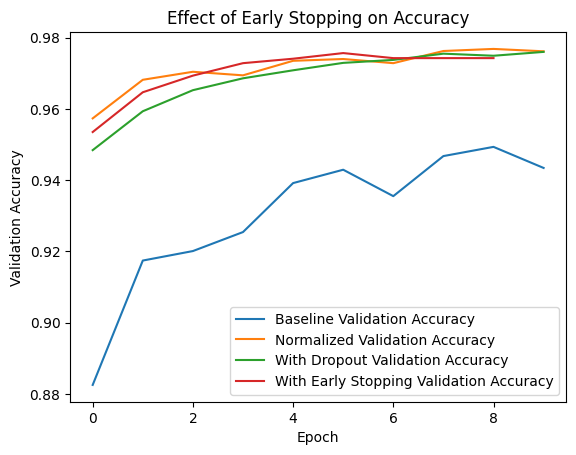

In [6]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

model_with_es = create_model_with_norm_data()

# train with early stop
history_es = model_with_es.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1, callbacks=[early_stopping])

# plot the effect of early stopping
plt.plot(history_baseline.history['val_accuracy'], label='Baseline Validation Accuracy')
# plot line for normalized data
plt.plot(history_norm_data.history['val_accuracy'], label='Normalized Validation Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='With Dropout Validation Accuracy')
plt.plot(history_es.history['val_accuracy'], label='With Early Stopping Validation Accuracy')
plt.title('Effect of Early Stopping on Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

## 5. L1/L2 Regularization
L1 and L2 regularization are two common regularization techniques that can be used to reduce overfitting.

L1 in Keras: `kernel_regularizer=regularizers.l1(0.001)`
L2 in Keras: `kernel_regularizer=regularizers.l2(0.001)`

L1 changes the loss function by adding the sum of the absolute weights to it. L2 changes the loss function by adding the sum of the squared weights to it.
- `L1` make zero some of the weights.
- `L2` make the weights small.

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7971 - loss: 0.9053 - val_accuracy: 0.9439 - val_loss: 0.3828
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9187 - loss: 0.4537 - val_accuracy: 0.9513 - val_loss: 0.3320
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9304 - loss: 0.4072 - val_accuracy: 0.9575 - val_loss: 0.3117
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9368 - loss: 0.3795 - val_accuracy: 0.9613 - val_loss: 0.2951
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9395 - loss: 0.3685 - val_accuracy: 0.9660 - val_loss: 0.2816
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9391 - loss: 0.3627 - val_accuracy: 0.9671 - val_loss: 0.2725
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9434 - loss: 0.3523 - val_accuracy: 0.9688 - val_loss: 0.2713
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9460 - loss: 0.3392 - 

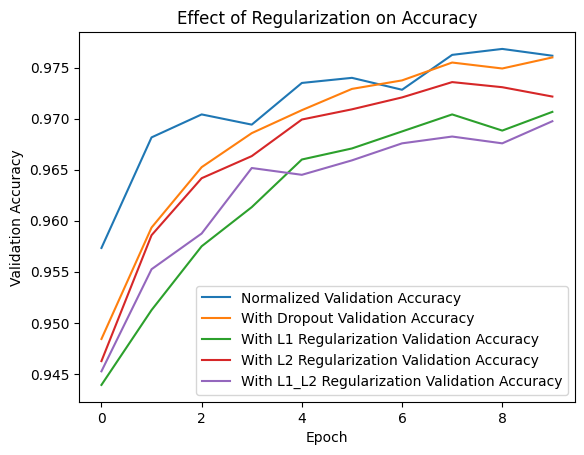

In [7]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1, l2, l1_l2
import matplotlib.pyplot as plt

# Define a model with L1 regularization
def create_model_with_l1():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu', kernel_regularizer=l1(0.0001)),  # L1 regularization
        Dropout(0.5), # Adding dropout which will also be regularized by L1
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define a model with L2 regularization
def create_model_with_l2():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu', kernel_regularizer=l2(0.0001)),  # L2 regularization
        Dropout(0.5), # Adding dropout which will also be regularized by L2
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# should we combine them both?
# Define a model with L1_L2 (combined) regularization
def create_model_with_l1_l2():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),  # L1_L2 regularization
        Dropout(0.5), # Adding dropout which will also be regularized by L1_L2
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Prepare and train the models
model_with_l1 = create_model_with_l1()
history_l1 = model_with_l1.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1)

model_with_l2 = create_model_with_l2()
history_l2 = model_with_l2.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1)

model_with_l1_l2 = create_model_with_l1_l2()
history_l1_l2 = model_with_l1_l2.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1)

# Plotting the effect of regularization
# plot line for normalized data
plt.plot(history_norm_data.history['val_accuracy'], label='Normalized Validation Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='With Dropout Validation Accuracy')
plt.plot(history_l1.history['val_accuracy'], label='With L1 Regularization Validation Accuracy')
plt.plot(history_l2.history['val_accuracy'], label='With L2 Regularization Validation Accuracy')
plt.plot(history_l1_l2.history['val_accuracy'], label='With L1_L2 Regularization Validation Accuracy')
plt.title('Effect of Regularization on Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

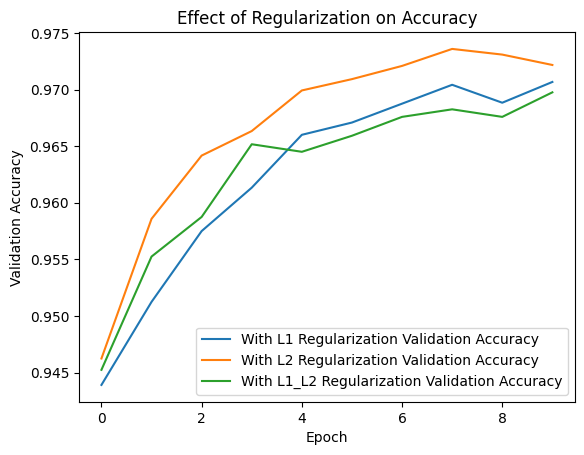

In [8]:
# Plotting the effect of regularization
# plot line for normalized data
# plt.plot(history_norm_data.history['val_accuracy'], label='Normalized Validation Accuracy')
# plt.plot(history_dropout.history['val_accuracy'], label='With Dropout Validation Accuracy')
plt.plot(history_l1.history['val_accuracy'], label='With L1 Regularization Validation Accuracy')
plt.plot(history_l2.history['val_accuracy'], label='With L2 Regularization Validation Accuracy')
plt.plot(history_l1_l2.history['val_accuracy'], label='With L1_L2 Regularization Validation Accuracy')
plt.title('Effect of Regularization on Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

## 6. K-fold cross validation

**`k-fold cross-validation in TensorFlow`** requires a bit more manual setup compared to libraries like scikit-learn, which offer built-in k-fold cross-validation functions. TensorFlow does not have a direct function for k-fold cross-validation, but you can achieve this by manually splitting your dataset into k folds and then training and evaluating your model on each fold.

Below is an example code that demonstrates how to perform k-fold cross-validation with the MNIST dataset in TensorFlow. This example uses a simple neural network similar to the ones discussed previously.

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8675 - loss: 0.4701 - val_accuracy: 0.9542 - val_loss: 0.1624
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9589 - loss: 0.1382 - val_accuracy: 0.9602 - val_loss: 0.1319
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9722 - loss: 0.0918 - val_accuracy: 0.9695 - val_loss: 0.1002
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9796 - loss: 0.0671 - val_accuracy: 0.9720 - val_loss: 0.0883
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9862 - loss: 0.0457 - val_accuracy: 0.9767 - val_loss: 0.0784
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9888 - loss: 0.0391 - val_accuracy: 0.9754 - val_loss: 0.0854
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9915 - loss: 0.0297 - val_accuracy: 0.9742 - val_loss: 0.0851
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9937 - loss: 0.0231 - 

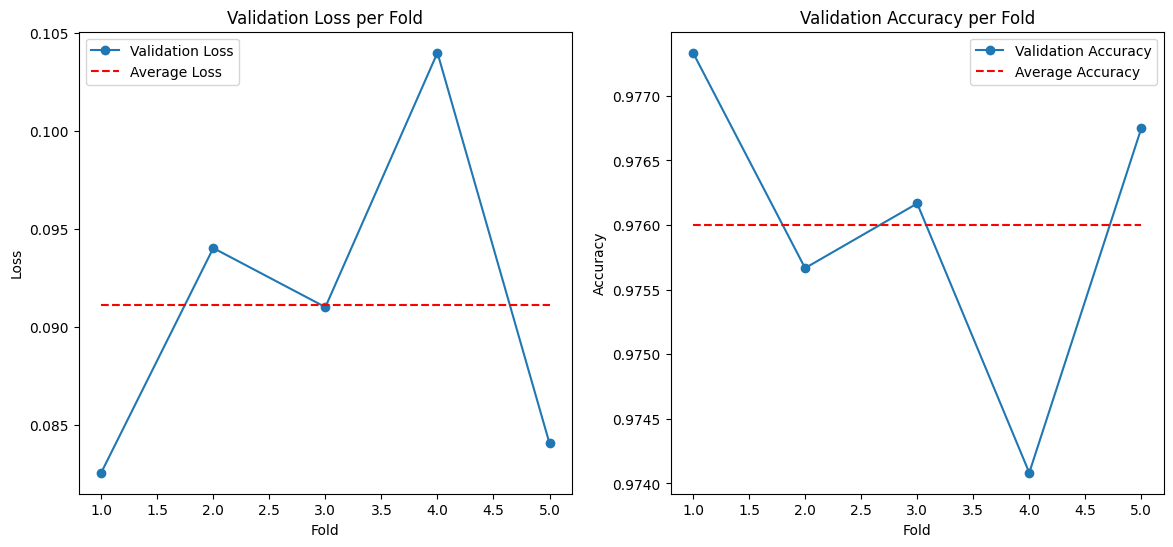

CPU times: user 6min 50s, sys: 1min 26s, total: 8min 16s
Wall time: 3min 55s


In [9]:
%%time
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize data
y_train = to_categorical(y_train, 10)  # One-hot encode labels

# Define a simple model architecture function
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Prepare for k-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True)

# Arrays to store scores
fold_idx = 1
scores = []

for train_index, val_index in kf.split(x_train):
    # Split data
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # create a model
    model_kfold_cv = create_model()

    # Train model
    history_kfold_cv = model_kfold_cv.fit(x_train_fold, y_train_fold, epochs=10, validation_data=(x_val_fold, y_val_fold), verbose=1)

    # Append the last score from the history
    scores.append((history_kfold_cv.history['val_loss'][-1], history_kfold_cv.history['val_accuracy'][-1]))

# Calculate and print average performance across all folds
average_loss, average_accuracy = np.mean(scores, axis=0)
print(f'\nK-Fold Validation Results:\nAverage Loss: {average_loss}, Average Accuracy: {average_accuracy}')

# Plotting
folds = range(1, k + 1)
val_losses, val_accuracies = zip(*scores)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(folds, val_losses, 'o-', label='Validation Loss')
plt.plot(folds, [average_loss] * k, 'r--', label='Average Loss')
plt.title('Validation Loss per Fold')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(folds, val_accuracies, 'o-', label='Validation Accuracy')
plt.plot(folds, [average_accuracy] * k, 'r--', label='Average Accuracy')
plt.title('Validation Accuracy per Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

This code performs the following steps:
1. Normalizes the data and one-hot encodes the labels.
2. Defines a simple neural network model inside a function so that a fresh model can be created for each fold.
3. Uses `KFold` from `sklearn.model_selection` to generate train/validation splits.
4. Trains a new model instance on each train fold and evaluates it on the corresponding validation fold.
5. Calculates and prints the average loss and accuracy across all folds at the end.

Remember, k-fold cross-validation can be computationally expensive since it involves training and evaluating k separate models. Adjust the number of epochs, model complexity, or the dataset size as necessary to manage the computational load.